In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ship_fuel_efficiency.csv')
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [3]:
# Convert month names to a categorical type to ensure proper ordering
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

# Aggregate total CO2 emissions by route
co2_by_route = df.groupby("route_id")["CO2_emissions"].sum().sort_values()

# Aggregate total fuel consumption by month
fuel_by_month = df.groupby("month")["fuel_consumption"].sum().reindex(month_order)

In [4]:
# Calculate fuel efficiency (distance per unit fuel)
df["fuel_efficiency"] = df["distance"] / df["fuel_consumption"]  
efficiency_by_route = df.groupby("route_id").agg(
    avg_fuel_efficiency=("fuel_efficiency", "mean"),
    avg_engine_efficiency=("engine_efficiency", "mean"),
    total_fuel_consumption=("fuel_consumption", "sum")
).reset_index()

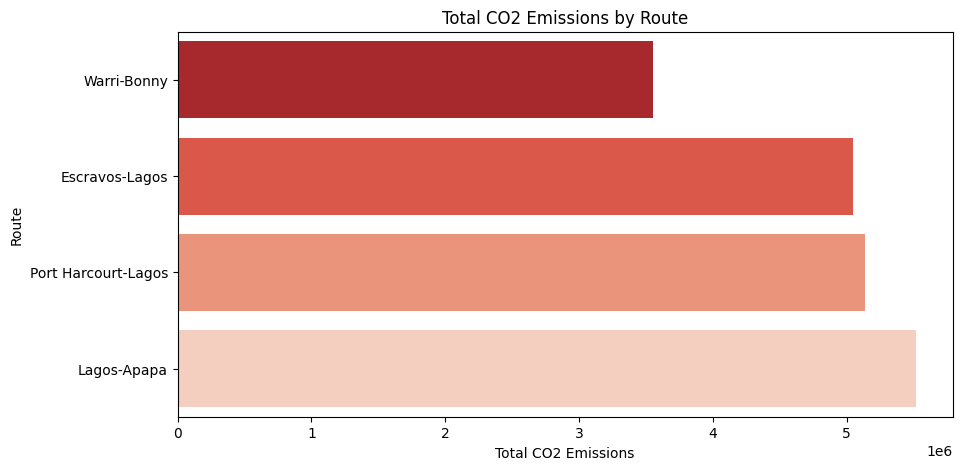

In [5]:
# Plot Total CO2 Emissions by Route (Bar Chart)
plt.figure(figsize=(10, 5))
sns.barplot(x=co2_by_route.values, y=co2_by_route.index, palette="Reds_r")
plt.xlabel("Total CO2 Emissions")
plt.ylabel("Route")
plt.title("Total CO2 Emissions by Route")
plt.show()

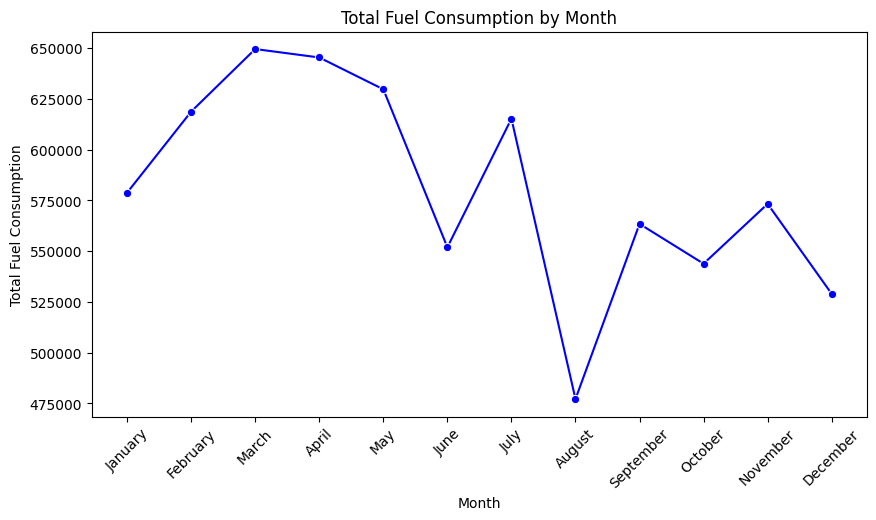

In [6]:
# Plot Total Fuel Consumption by Month (Line Chart)
plt.figure(figsize=(10, 5))
sns.lineplot(x=fuel_by_month.index, y=fuel_by_month.values, marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Total Fuel Consumption")
plt.title("Total Fuel Consumption by Month")
plt.xticks(rotation=45)
plt.show()

In [7]:
# Grouping data by Fuel Type
fuel_type_analysis = df.groupby("fuel_type").agg(
    total_fuel_consumption=("fuel_consumption", "sum"),
    avg_fuel_efficiency=("fuel_efficiency", "mean"),
    avg_engine_efficiency=("engine_efficiency", "mean"),
    total_CO2_emission=("CO2_emissions", "sum")
).reset_index()

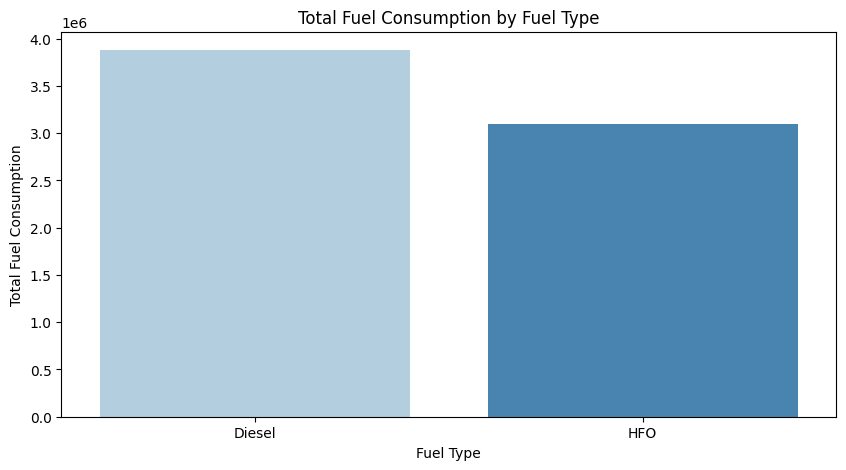

In [8]:
# Visualizing Total Fuel Consumption by Fuel Type
plt.figure(figsize=(10, 5))
sns.barplot(data=fuel_type_analysis, x="fuel_type", y="total_fuel_consumption", palette="Blues")
plt.title("Total Fuel Consumption by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Total Fuel Consumption")
plt.show()

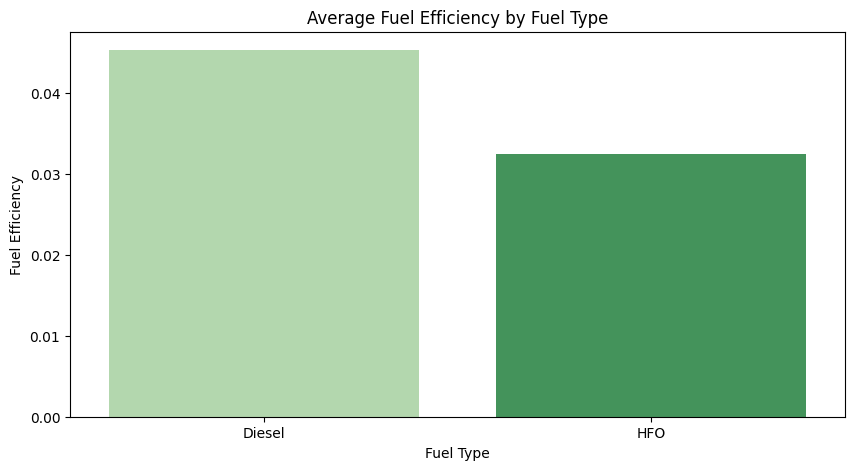

In [9]:
# Visualizing Average Fuel Efficiency by Fuel Type
plt.figure(figsize=(10, 5))
sns.barplot(data=fuel_type_analysis, x="fuel_type", y="avg_fuel_efficiency", palette="Greens")
plt.title("Average Fuel Efficiency by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Fuel Efficiency")
plt.show()

In [10]:
# Grouping data by Ship Type
ship_type_analysis = df.groupby("ship_type").agg(
    total_fuel_consumption=("fuel_consumption", "sum"),
    avg_fuel_efficiency=("fuel_efficiency", "mean"),
    avg_engine_efficiency=("engine_efficiency", "mean"),
    total_CO2_emission=("CO2_emissions", "sum")
).reset_index()

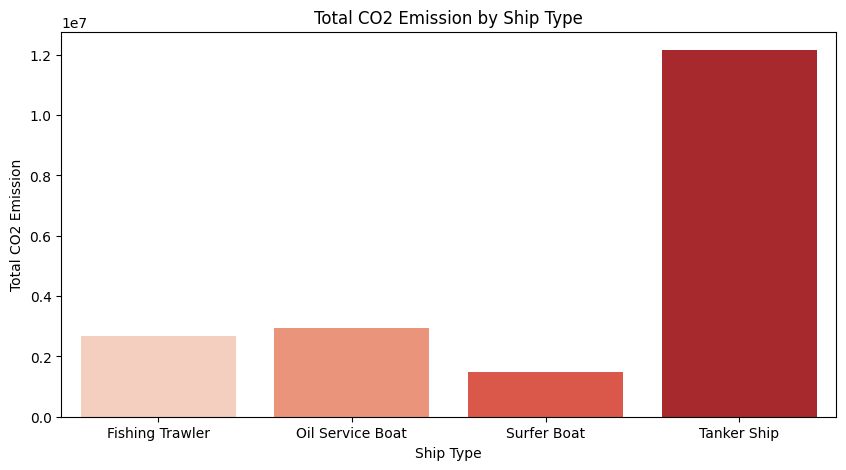

In [11]:
# Visualizing Total CO2 Emissions by Ship Type
plt.figure(figsize=(10, 5))
sns.barplot(data=ship_type_analysis, x="ship_type", y="total_CO2_emission", palette="Reds")
plt.title("Total CO2 Emission by Ship Type")
plt.xlabel("Ship Type")
plt.ylabel("Total CO2 Emission")
plt.show()

In [12]:
# Grouping data by Weather Condition
weather_analysis = df.groupby("weather_conditions").agg(
    total_fuel_consumption=("fuel_consumption", "sum"),
    avg_fuel_efficiency=("fuel_efficiency", "mean"),
    avg_engine_efficiency=("engine_efficiency", "mean"),
    total_CO2_emission=("CO2_emissions", "sum")
).reset_index()

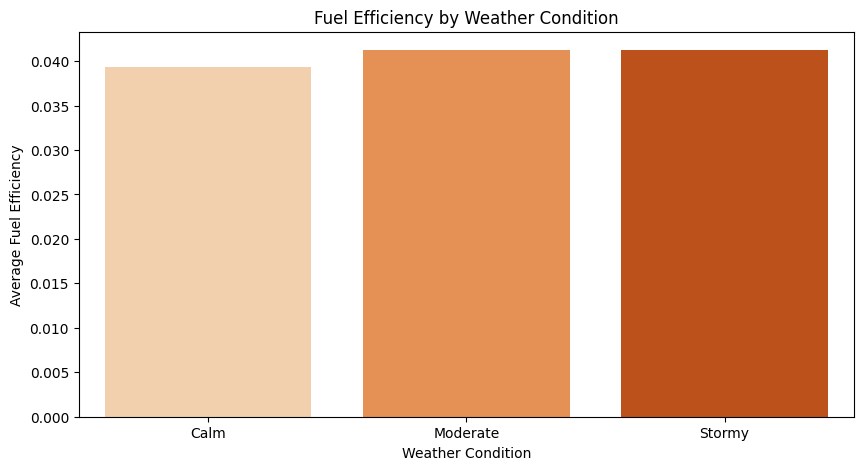

In [13]:
# Visualizing Fuel Efficiency by Weather Condition
plt.figure(figsize=(10, 5))
sns.barplot(data=weather_analysis, x="weather_conditions", y="avg_fuel_efficiency", palette="Oranges")
plt.title("Fuel Efficiency by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Fuel Efficiency")
plt.show()

In [14]:
print("Fuel Type Analysis:\n", fuel_type_analysis)
print("\nShip Type Analysis:\n", ship_type_analysis)
print("\nWeather Condition Analysis:\n", weather_analysis)

Fuel Type Analysis:
   fuel_type  total_fuel_consumption  avg_fuel_efficiency  \
0    Diesel              3879336.49             0.045357   
1       HFO              3096378.52             0.032545   

   avg_engine_efficiency  total_CO2_emission  
0              82.309511         10692594.67  
1              83.037264          8553660.36  

Ship Type Analysis:
           ship_type  total_fuel_consumption  avg_fuel_efficiency  \
0   Fishing Trawler               968751.28             0.040181   
1  Oil Service Boat              1068729.68             0.033390   
2       Surfer Boat               539827.31             0.069055   
3       Tanker Ship              4398406.74             0.025323   

   avg_engine_efficiency  total_CO2_emission  
0              82.138300          2673927.18  
1              83.419559          2932635.15  
2              82.444660          1483154.25  
3              82.183015         12156538.45  

Weather Condition Analysis:
   weather_conditions  total_f

In [15]:
# Compute KPI Metrics
total_fuel_consumption = df["fuel_consumption"].sum()
total_CO2_emission = df["CO2_emissions"].sum()
avg_engine_efficiency = df["engine_efficiency"].mean()
avg_fuel_efficiency = df["fuel_efficiency"].mean()

kpi_metrics = {
    "Total Fuel Consumption": total_fuel_consumption,
    "Total CO2 Emission": total_CO2_emission,
    "Average Engine Efficiency": avg_engine_efficiency,
    "Average Fuel Efficiency": avg_fuel_efficiency
}

kpi_metrics

{'Total Fuel Consumption': 6975715.01,
 'Total CO2 Emission': 19246255.03,
 'Average Engine Efficiency': 82.58292361111111,
 'Average Fuel Efficiency': 0.040543717180191605}

In [16]:
# Top 5 routes with highest CO₂ emissions
top_routes_co2 = co2_by_route.tail(5)  # Get top 5 highest emitting routes

# Percentage contribution of top 5 routes to total CO₂ emissions
top_routes_co2_pct = (top_routes_co2 / total_CO2_emission) * 100

# Monthly fuel consumption trends with % increase/decrease
fuel_by_month_pct_change = fuel_by_month.pct_change() * 100

# Identify best and worst routes in terms of fuel and engine efficiency
best_fuel_eff_route = efficiency_by_route.loc[efficiency_by_route["avg_fuel_efficiency"].idxmax()]
worst_fuel_eff_route = efficiency_by_route.loc[efficiency_by_route["avg_fuel_efficiency"].idxmin()]

best_engine_eff_route = efficiency_by_route.loc[efficiency_by_route["avg_engine_efficiency"].idxmax()]
worst_engine_eff_route = efficiency_by_route.loc[efficiency_by_route["avg_engine_efficiency"].idxmin()]

# Find outliers in fuel vs engine efficiency (routes that deviate significantly)
efficiency_by_route["efficiency_gap"] = efficiency_by_route["avg_engine_efficiency"] - efficiency_by_route["avg_fuel_efficiency"]
outlier_routes = efficiency_by_route[efficiency_by_route["efficiency_gap"].abs() > efficiency_by_route["efficiency_gap"].std()]

# Compile all insights into a dictionary
detailed_insights = {
    "Top 5 CO2 Emitting Routes": top_routes_co2.to_dict(),
    "Percentage Contribution of Top 5 Routes to CO2": top_routes_co2_pct.to_dict(),
    "Monthly Fuel Consumption % Change": fuel_by_month_pct_change.to_dict(),
    "Best Fuel Efficient Route": best_fuel_eff_route.to_dict(),
    "Worst Fuel Efficient Route": worst_fuel_eff_route.to_dict(),
    "Best Engine Efficient Route": best_engine_eff_route.to_dict(),
    "Worst Engine Efficient Route": worst_engine_eff_route.to_dict(),
    "Efficiency Outliers (Routes with Large Efficiency Gap)": outlier_routes.to_dict(orient="records")
}

detailed_insights

{'Top 5 CO2 Emitting Routes': {'Warri-Bonny': 3549575.71,
  'Escravos-Lagos': 5045208.21,
  'Port Harcourt-Lagos': 5135239.4,
  'Lagos-Apapa': 5516231.71},
 'Percentage Contribution of Top 5 Routes to CO2': {'Warri-Bonny': 18.4429422995129,
  'Escravos-Lagos': 26.213973586735744,
  'Port Harcourt-Lagos': 26.681759085055624,
  'Lagos-Apapa': 28.66132502869572},
 'Monthly Fuel Consumption % Change': {'January': nan,
  'February': 6.8970110084802805,
  'March': 4.973822036070841,
  'April': -0.6392525822244033,
  'May': -2.4268874915645444,
  'June': -12.350942515315634,
  'July': 11.472480530253538,
  'August': -22.43605884571689,
  'September': 18.070155044778534,
  'October': -3.4791082863459666,
  'November': 5.416116841066199,
  'December': -7.724712388113131},
 'Best Fuel Efficient Route': {'route_id': 'Port Harcourt-Lagos',
  'avg_fuel_efficiency': 0.04102359339338293,
  'avg_engine_efficiency': 82.51264781491003,
  'total_fuel_consumption': 1869198.41},
 'Worst Fuel Efficient Rout

In [17]:
# Assuming co2_by_route is a DataFrame that you have
top_routes_co2 = co2_by_route.tail(5)  # Get top 5 highest emitting routes

# Calculate the percentage contribution of each route
top_routes_co2_pct = (top_routes_co2 / total_CO2_emission) * 100

# Convert the Series to a DataFrame
top_routes_co2_df = top_routes_co2.reset_index()

# Add the percentage contribution to the DataFrame
top_routes_co2_df['% Contribution to Total CO₂'] = top_routes_co2_pct.values

# Display the DataFrame
top_routes_co2_df

,route_id,CO2_emissions,% Contribution to Total CO₂
0,Warri-Bonny,3549575.71,18.442942
1,Escravos-Lagos,5045208.21,26.213974
2,Port Harcourt-Lagos,5135239.40,26.681759
3,Lagos-Apapa,5516231.71,28.661325


In [18]:
# Assuming fuel_by_month is a DataFrame that you have
fuel_by_month_pct_change = fuel_by_month.pct_change() * 100

# Reset index to ensure "Month" becomes a column
fuel_by_month_pct_change = fuel_by_month_pct_change.reset_index()

fuel_by_month_pct_change.columns = ['Month', '% Change from Previous Month']

# Convert to DataFrame
fuel_by_month_pct_change_df = pd.DataFrame(fuel_by_month_pct_change)

# Display the DataFrame
fuel_by_month_pct_change_df

,Month,% Change from Previous Month
0,January,NaN
1,February,6.897011
2,March,4.973822
3,April,-0.639253
4,May,-2.426887
5,June,-12.350943
6,July,11.472481
7,August,-22.436059
8,September,18.070155
9,October,-3.479108


In [19]:
# Assuming efficiency_by_route is a DataFrame that you have
best_fuel_eff_route = efficiency_by_route.loc[efficiency_by_route["avg_fuel_efficiency"].idxmax()]
worst_fuel_eff_route = efficiency_by_route.loc[efficiency_by_route["avg_fuel_efficiency"].idxmin()]

best_engine_eff_route = efficiency_by_route.loc[efficiency_by_route["avg_engine_efficiency"].idxmax()]
worst_engine_eff_route = efficiency_by_route.loc[efficiency_by_route["avg_engine_efficiency"].idxmin()]

# Convert to DataFrame
best_worst_routes_df = pd.DataFrame({
    "Best Fuel Efficient Route": best_fuel_eff_route,
    "Worst Fuel Efficient Route": worst_fuel_eff_route,
    "Best Engine Efficient Route": best_engine_eff_route,
    "Worst Engine Efficient Route": worst_engine_eff_route
})
best_worst_routes_df

,Best Fuel Efficient Route,Worst Fuel Efficient Route,Best Engine Efficient Route,Worst Engine Efficient Route
route_id,Port Harcourt-Lagos,Escravos-Lagos,Lagos-Apapa,Escravos-Lagos
avg_fuel_efficiency,0.041024,0.040106,0.040349,0.040106
avg_engine_efficiency,82.512648,82.497019,82.683557,82.497019
total_fuel_consumption,1869198.41,1820080.98,2006561.29,1820080.98
efficiency_gap,82.471624,82.456913,82.643208,82.456913


In [20]:
# Assuming efficiency_by_route is a DataFrame that you have
efficiency_by_route["efficiency_gap"] = efficiency_by_route["avg_engine_efficiency"] - efficiency_by_route["avg_fuel_efficiency"]
outlier_routes = efficiency_by_route[efficiency_by_route["efficiency_gap"].abs() > efficiency_by_route["efficiency_gap"].std()]

# Convert to DataFrame
outlier_routes_df = pd.DataFrame(outlier_routes)
outlier_routes_df

,route_id,avg_fuel_efficiency,avg_engine_efficiency,total_fuel_consumption,efficiency_gap
0,Escravos-Lagos,0.040106,82.497019,1820080.98,82.456913
1,Lagos-Apapa,0.040349,82.683557,2006561.29,82.643208
2,Port Harcourt-Lagos,0.041024,82.512648,1869198.41,82.471624
3,Warri-Bonny,0.040715,82.650918,1279874.33,82.610204
